In [ ]:
import pandas as pd
import os
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_palette("colorblind")
warnings.filterwarnings('ignore')
import sys
from pathlib import Path
import ipynbname
ROOT = Path(ipynbname.path()).resolve().parents[1]

In [130]:

baseline_csv = ROOT / "RQ5_Baseline" / "baseline.csv"
eff_csv      = ROOT / "RQ4_Feature_Selection" / "58_mt_effectiveness.csv"  # ajuste le nom si besoin
df = pd.read_csv(baseline_csv)
meta_match = pd.read_csv(eff_csv)


In [131]:
meta_match = meta_match.rename(columns={
    'category':'dataset',
    'Recall@GS':'All_RecallAtSizeofGroundTruth'
})
meta_match = meta_match.rename(columns={'MRR': 'mrr'})
meta_match = meta_match.rename(columns={'precision': 'All_Precision'})
meta_match = meta_match.rename(columns={'recall': 'All_Recall'})
meta_match = meta_match.rename(columns={'f1': 'All_F1Score'})


common_cols = [c for c in df.columns if c in meta_match.columns]         
df_only    = [c for c in df.columns if c not in meta_match.columns]      
meta_only   = [c for c in meta_match.columns if c not in df.columns]      
final_cols  = common_cols + df_only + meta_only

df_all = pd.concat([df, meta_match], ignore_index=True, sort=False)

df_all = df_all.reindex(columns=final_cols)

df_all.head()


,mrr,All_Precision,All_F1Score,All_Recall,All_RecallAtSizeofGroundTruth,benchmark,scenario,dataset,source_table,target_table,...,type,embedding_model,classifier,repeat,seed,nb_0,nb_1,elapsed_train,elapsed_test,n_features_used
0,1.0,1.0,0.857143,0.750000,1.0,valentine,si_si,Magellan,amazon_google_exp_source.csv,amazon_google_exp_target.csv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,0.888889,0.800000,1.0,valentine,si_si,Magellan,beeradvo_ratebeer_source.csv,beeradvo_ratebeer_target.csv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,0.888889,0.800000,1.0,valentine,si_si,Magellan,dblp_acm_source.csv,dblp_acm_target.csv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,0.800000,0.666667,1.0,valentine,si_si,Magellan,itunes_amazon_source.csv,itunes_amazon_target.csv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,0.888889,0.800000,1.0,valentine,si_si,Magellan,dblp_scholar_source.csv,dblp_scholar_target.csv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
meta_match[['embedding_model','All_F1Score']].groupby(['embedding_model']).agg(['mean','std'])

All_F1Score          
                       mean       std
embedding_model                      
albert             0.962627  0.007908
bart               0.962627  0.007908
bert               0.962627  0.007908
distilbert         0.962627  0.007908
minilm             0.963421  0.007714
roberta            0.962627  0.007908

In [133]:
common_cols

['mrr',
 'All_Precision',
 'All_F1Score',
 'All_Recall',
 'All_RecallAtSizeofGroundTruth']

In [134]:

agg = (
    df_all.groupby(['method'], as_index=False)
      .agg(
          precision_all_mean=('All_Precision', 'mean'),
          precision_all_std =('All_Precision', 'std'),
          recall_all_mean=('All_Recall', 'mean'),
          recall_all_std =('All_Recall', 'std'),
          f1_mean=('All_F1Score', 'mean'),
          f1_std =('All_F1Score', 'std'),
          
          mrr_mean=('mrr', 'mean'),
          mrr_std =('mrr', 'std'),

          recall_at_gt_mean=('All_RecallAtSizeofGroundTruth', 'mean'),
          recall_at_gt_std =('All_RecallAtSizeofGroundTruth', 'std'),
      )
)
agg

,method,precision_all_mean,precision_all_std,recall_all_mean,recall_all_std,f1_mean,f1_std,mrr_mean,mrr_std,recall_at_gt_mean,recall_at_gt_std
0,Coma,0.737053,0.333133,0.480995,0.297569,0.511571,0.251748,0.685350,0.323494,0.633026,0.345932
1,Coma++,0.790500,0.318788,0.555814,0.272972,0.585105,0.233751,0.791652,0.266864,0.726516,0.317251
2,Cupid,0.460143,0.396409,0.367148,0.422267,0.342568,0.374853,0.413061,0.412092,0.348126,0.365222
3,Distribution,0.286431,0.293242,0.226145,0.279528,0.228018,0.245884,0.260264,0.288957,0.229966,0.285592
4,ISResMat,0.444145,0.259220,0.705754,0.246629,0.499319,0.248575,0.796093,0.188788,0.407438,0.304776
5,Magneto,0.502255,0.307025,0.897471,0.131785,0.581099,0.291729,0.933809,0.090119,0.770472,0.283889
6,MagnetoFT,0.508052,0.309628,0.898122,0.149276,0.587352,0.295292,0.935455,0.095980,0.768054,0.292358
7,MagnetoFTGPT,0.678808,0.337573,0.892393,0.210989,0.717249,0.306464,0.956633,0.089849,0.772951,0.297902
8,MagnetoGPT,0.687304,0.335030,0.893880,0.199991,0.721714,0.302220,0.951653,0.107783,0.768591,0.296977
9,SimilarityFlooding,0.493882,0.347040,0.686592,0.383062,0.525321,0.352353,0.748364,0.301010,0.524283,0.377379


In [135]:
def format_latex(mean, std):
    return f"${mean:.2f}\\pm{std:.2f}$"

grouped = (
    df_all.groupby(['method'], as_index=False)
      .agg(
          precision_all_mean=('All_Precision', 'mean'),
          precision_all_std =('All_Precision', 'std'),
          recall_all_mean   =('All_Recall', 'mean'),
          recall_all_std    =('All_Recall', 'std'),
          f1_mean           =('All_F1Score', 'mean'),
          f1_std            =('All_F1Score', 'std'),
          mrr_mean          =('mrr', 'mean'),
          mrr_std           =('mrr', 'std'),
          recall_at_gt_mean =('All_RecallAtSizeofGroundTruth', 'mean'),
          recall_at_gt_std  =('All_RecallAtSizeofGroundTruth', 'std'),
      )
)

# Construction du tableau final: colonnes = métriques, valeurs = "mean ± std"
formatted = grouped[['method']].rename(columns={'method': 'Method'}).copy()

formatted['Precision']    = [format_latex(m, s) for m, s in zip(grouped['precision_all_mean'], grouped['precision_all_std'])]
formatted['Recall']       = [format_latex(m, s) for m, s in zip(grouped['recall_all_mean'], grouped['recall_all_std'])]
formatted['F1-score']     = [format_latex(m, s) for m, s in zip(grouped['f1_mean'], grouped['f1_std'])]
formatted['MRR']          = [format_latex(m, s) for m, s in zip(grouped['mrr_mean'], grouped['mrr_std'])]
formatted['Recall@|GT|']  = [format_latex(m, s) for m, s in zip(grouped['recall_at_gt_mean'], grouped['recall_at_gt_std'])]

formatted = formatted[['Method', 'Precision', 'Recall', 'F1-score', 'MRR', 'Recall@|GT|']]


# Génération du LaTeX
latex_code = formatted.to_latex(
    escape=False,
    index=False,
    column_format="l l c c",
    caption=f"Average Precision, Recall, and F1-score ($\\pm$ std) per baseline.",
    label=f"tab:all_vs_one_methods"
)

print("\n\n")
print(latex_code)





\begin{table}
\caption{Average Precision, Recall, and F1-score ($\pm$ std) per baseline.}
\label{tab:all_vs_one_methods}
\begin{tabular}{l l c c}
\toprule
Method & Precision & Recall & F1-score & MRR & Recall@|GT| \\
\midrule
Coma & $0.74\pm0.33$ & $0.48\pm0.30$ & $0.51\pm0.25$ & $0.69\pm0.32$ & $0.63\pm0.35$ \\
Coma++ & $0.79\pm0.32$ & $0.56\pm0.27$ & $0.59\pm0.23$ & $0.79\pm0.27$ & $0.73\pm0.32$ \\
Cupid & $0.46\pm0.40$ & $0.37\pm0.42$ & $0.34\pm0.37$ & $0.41\pm0.41$ & $0.35\pm0.37$ \\
Distribution & $0.29\pm0.29$ & $0.23\pm0.28$ & $0.23\pm0.25$ & $0.26\pm0.29$ & $0.23\pm0.29$ \\
ISResMat & $0.44\pm0.26$ & $0.71\pm0.25$ & $0.50\pm0.25$ & $0.80\pm0.19$ & $0.41\pm0.30$ \\
Magneto & $0.50\pm0.31$ & $0.90\pm0.13$ & $0.58\pm0.29$ & $0.93\pm0.09$ & $0.77\pm0.28$ \\
MagnetoFT & $0.51\pm0.31$ & $0.90\pm0.15$ & $0.59\pm0.30$ & $0.94\pm0.10$ & $0.77\pm0.29$ \\
MagnetoFTGPT & $0.68\pm0.34$ & $0.89\pm0.21$ & $0.72\pm0.31$ & $0.96\pm0.09$ & $0.77\pm0.30$ \\
MagnetoGPT & $0.69\pm0.34$ & $0.89\p

In [143]:
def fix_df(df):
    
    mapping = {
        'datasets/WikidataHumanCurated': 'Wikidata',
        'musicians': 'Wikidata',
        'datasets/MagellanHumanCurated': 'Magellan',
        'datasets/TPC-DI': 'TPC-DI',
        'datasets/OpenData': 'OpenData',
        'datasets/ChEMBL': 'ChEMBL'
    }
    df['dataset'] = df['dataset'].apply(lambda x: mapping.get(x, x))

    df = df.rename(columns={'All_RecallAtSizeofGroundTruth': 'Recall@GT'})
    df = df.rename(columns={'All_F1Score': 'F1'})
    df = df.rename(columns={'mrr': 'MRR'})

    df['method'] = df['method'].replace(
        {'MatchMaker': 'Magneto', 'MatchMakerGPT': 'MagnetoGPT', 'MatchMakerFT': 'MagnetoFT', 'MatchMakerFTGPT': 'MagnetoFTGPT'})
    
    df['method'].unique()

    df = df.round(3)

    return df

In [144]:
import pandas as pd
import sys
meta_match = pd.read_csv(ROOT / 'RQ4_Feature_Selection/58_mt_effectiveness_by_cat.csv')
df=pd.read_csv('baseline.csv')
df['method'] = df['method'].replace('SimilarityFlooding', 'SimFlooding')
df['method'] = df['method'].replace('DistributionBased', 'Distribution')
df = fix_df(df)
meta_match['method'] = 'MetaMatch'

meta_match = meta_match.rename(columns={
    # au cas où tu avais renommé précédemment:
    'category':'dataset',
    'f1': 'f1',
})

meta_match = meta_match.rename(columns={'f1': 'F1'})
meta_match = meta_match.rename(columns={'precision': 'All_Precision'})
meta_match = meta_match.rename(columns={'recall': 'All_Recall'})
meta_match = meta_match.rename(columns={'Recall@GS': 'Recall@GT'})


# --- 2) Construire l’ordre final des colonnes ---
common_cols = [c for c in df.columns if c in meta_match.columns]          # colonnes communes (ordre de df)
df_only    = [c for c in df.columns if c not in meta_match.columns]       # colonnes propres à df
meta_only   = [c for c in meta_match.columns if c not in df.columns]       # colonnes propres à meta_match
final_cols  = common_cols + df_only + meta_only

# --- 3) Concaténation ---
df_all = pd.concat([df, meta_match], ignore_index=True, sort=False)

df_all = df_all.reindex(columns=final_cols)

df_all.head()


,dataset,method,MRR,All_Precision,F1,All_Recall,Recall@GT,benchmark,scenario,source_table,...,One2One_RecallAtSizeofGroundTruth,type,embedding_model,classifier,repeat,seed,nb_test,nb_0,nb_1,n_features_used
0,Magellan,Coma++,1.0,1.0,0.857,0.750,1.0,valentine,si_si,amazon_google_exp_source.csv,...,0.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Magellan,Coma++,1.0,1.0,0.889,0.800,1.0,valentine,si_si,beeradvo_ratebeer_source.csv,...,0.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Magellan,Coma++,1.0,1.0,0.889,0.800,1.0,valentine,si_si,dblp_acm_source.csv,...,0.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Magellan,Coma++,1.0,1.0,0.800,0.667,1.0,valentine,si_si,itunes_amazon_source.csv,...,0.667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Magellan,Coma++,1.0,1.0,0.889,0.800,1.0,valentine,si_si,dblp_scholar_source.csv,...,0.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
common_cols

['dataset', 'method', 'MRR', 'All_Precision', 'F1', 'All_Recall', 'Recall@GT']

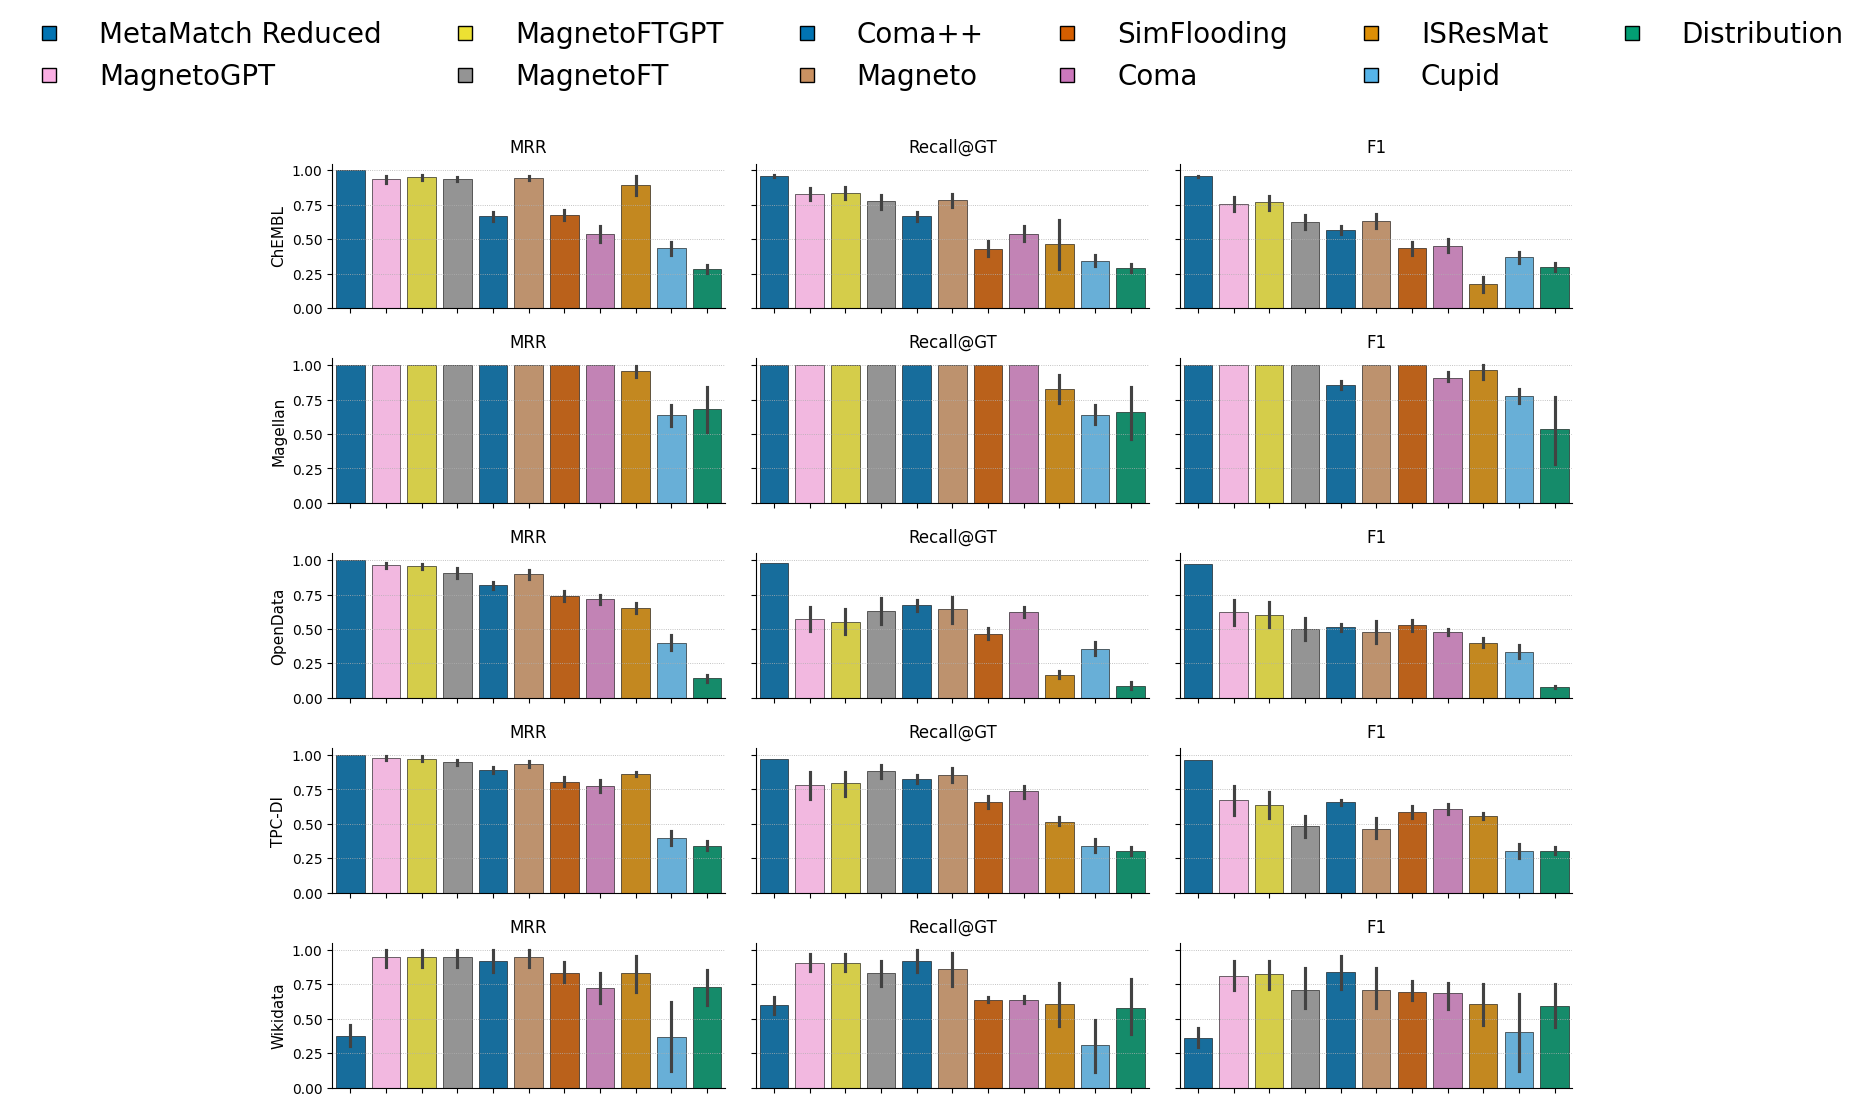

In [ ]:
cols_needed = ['dataset', 'method', 'MRR', 'Recall@GT', 'F1','All_Precision', 'All_Recall']
missing = [c for c in cols_needed if c not in df_all.columns]

df_plot = df_all[cols_needed].copy()
df_plot['method']=df_plot['method'].replace({'MetaMatch':'MetaMatch Reduced'})
df_plot=df_plot.rename(columns={'All_Precision':'Precision'})
df_plot=df_plot.rename(columns={'All_Recall':'Recall'})
# forcer en numérique (au cas où)
for m in ['MRR', 'Recall@GT', 'F1','Precision','Recall']:
    df_plot[m] = pd.to_numeric(df_plot[m], errors='coerce')

# --- métriques pour la figure ---
metrics =['MRR', 'Recall@GT', 'F1','Precision','Recall']

dfp = df_plot.copy()
dfp = dfp[dfp['dataset'].notna() & dfp['method'].notna()]
if dfp.empty:
    raise ValueError("df_plot est vide ou n’a pas de valeurs non-NaN pour 'dataset' et 'method'.")

# forcer numériques
for m in ['MRR', 'Recall@GT', 'F1']:
    dfp[m] = pd.to_numeric(dfp[m], errors='coerce')

# palette colorblind + MetaMatch en rouge
methods_present = dfp['method'].dropna().unique().tolist()
base_palette = sns.color_palette("colorblind", n_colors=max(3, len(methods_present)))
palette_map = {m: c for m, c in zip(methods_present, base_palette)}
if 'MetaMatch' in palette_map:
    palette_map['MetaMatch'] = '#d62728'  # rouge

metrics = ['MRR', 'Recall@GT', 'F1']

g = dfp.groupby('method', as_index=False)['F1'].mean()
if g['F1'].notna().any():
    global_order_f1 = (
        g.assign(_pri=lambda x: ~x['method'].eq('MetaMatch'))  # False pour MetaMatch -> passe devant en cas d'égalité
         .sort_values(['F1', '_pri', 'method'], ascending=[False, True, True])
         ['method'].tolist()
    )
else:
    global_order_f1 = sorted(dfp['method'].unique().tolist(), key=lambda m: (m != 'MetaMatch', m))

def plot_panel(df_dataset, ax, metric, palette, order_):
    order_local = [m for m in order_ if m in df_dataset['method'].unique()]
    sns.barplot(
        data=df_dataset, x="method", y=metric, ax=ax,
        order=order_local, estimator="mean", errorbar=("ci", 95),
        palette=palette, edgecolor="black", linewidth=0.4
    )
    ax.set_title(metric, fontsize=12, pad=8)
    ax.set_ylim(0, 1.05)
    ax.grid(axis="y", linestyle=":", linewidth=0.6)
    ax.set_xlabel("")
    ax.set_xticklabels([])
    ax.set_ylabel("")

def plot_bars_all_valentine(df, figsize=(14, 12), save=None):
    df = df.copy()
    # GDC en premier
    df = df.sort_values(by='dataset')
    df = df.sort_values(by='dataset', key=lambda x: x != 'GDC')

    datasets = list(sorted(df['dataset'].dropna().unique(), key=lambda d: (d != 'GDC', d)))
    n_datasets = len(datasets)
    if n_datasets == 0:
        raise ValueError("Aucun dataset trouvé dans df_plot['dataset'] (après filtrage).")

    fig, axes = plt.subplots(n_datasets, len(metrics), figsize=figsize, sharey=True)
    if n_datasets == 1:
        axes = [axes]
    fig.subplots_adjust(wspace=0.08, hspace=0.35)

    for di, dataset in enumerate(datasets):
        df_dataset = df[df['dataset'] == dataset]
        for mi, metric in enumerate(metrics):
            ax = axes[di][mi] if n_datasets > 1 else axes[0][mi]
            plot_panel(df_dataset, ax, metric, palette_map, global_order_f1)  # <-- ordre FIXE partout
            if mi == 0:
                ax.set_ylabel(dataset, fontsize=11)

    # légende (dans l'ordre global)
    meths_for_legend = [m for m in global_order_f1 if m in palette_map]
    handles = [
        mlines.Line2D([], [], marker='s', linestyle='', markersize=10,
                      markerfacecolor=palette_map[m], markeredgecolor="black", label=m)
        for m in meths_for_legend
    ]
    fig.legend(handles, [h.get_label() for h in handles],
               ncol=min(6, len(handles)), loc='upper center',
               bbox_to_anchor=(0.5, 1.02), frameon=False,fontsize=20)

    sns.despine()
    if save is not None:
        plt.savefig(save, dpi=300, bbox_inches="tight")
    return fig, axes

# appel
_ = plot_bars_all_valentine(dfp, figsize=(16, 12))
plt.show()
